In [ ]:
import numpy as np
import pandas as pd
import time
import warnings
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [ ]:
datos = pd.read_excel("DatosLimpios_AllFeatures.xlsx", names=['rang1', 'rang2', 'rang3', 'rang4','rang5', 'Femenino', 'Masculino', 'Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
datos

,rang1,rang2,rang3,rang4,rang5,Femenino,Masculino,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,0,1,0,0,0,0,1,1,0,0,0,0,1
6,0,1,0,0,0,0,1,0,0,0,1,0,1
11,0,0,0,0,1,1,0,0,0,0,0,1,1
12,0,0,1,0,0,0,1,0,0,0,0,1,1
13,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,1,0,1,0,0,0,0,1,0,0
2200,0,0,0,0,1,0,1,0,1,0,0,0,0
2201,1,0,0,0,0,1,0,1,0,0,0,0,1
2204,0,0,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
datos.shape

(749, 13)

In [ ]:
datos = datos.values
X = datos[:, :-1]
y = datos[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier( n_estimators = 10,
                            max_depth    = None,
                            max_features = 'auto',
                            oob_score    = False,
                            random_state = 123)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6622222222222223


In [ ]:
a = cross_val_score(clf, X_train, y_train, cv = 5, scoring="accuracy")
print("Accuracy: {0: .2f}".format(a.mean()))

Accuracy:  0.72


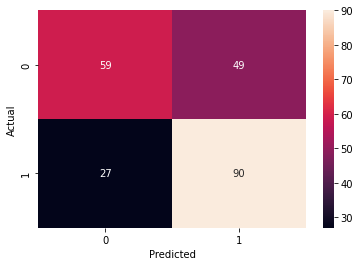

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6622222222222223
Precision: 0.6474820143884892
Recall: 0.7692307692307693


In [ ]:

X_new = pd.DataFrame({'rang1': [0], 'rang2': [0], 'rang3': [1], 'rang4': [0], 'rang5': [0], 'Femenino': [1], 'Masculino': [0], 'Animado': [0], 'Confiable': [0], 'Extravertido': [0], 'Responsable': [0], 'Serio': [1]})
print("El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto\n")
print("El estilo de vestir es:", clf.predict(X_new))

El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto

El estilo de vestir es: [1]
